# Data Generation

This nb to generate data of the BE 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
SEED=1

**Create df**

In [3]:
nb_days = 1

end_time = datetime.today()
# ex: '11/16/2022, 17:34:05'

# 10 days before
start_time = end_time - timedelta(days=nb_days)

n_points = nb_days * 24 * 60 # minutes in `nb_days` days

df_time = pd.date_range(start=start_time,
                        end=end_time,
                        periods=n_points)
# ex:Series(['2021-03-25 14:22:24.824136', ...])

df_time = df_time.strftime("%m/%d/%Y %H:%M:%S")

print(f"Extended period, from: `{start_time}` until `{end_time}`")
print(f"Generated {len(df_time)} points")

Extended period, from: `2022-11-16 15:26:47.328633` until `2022-11-17 15:26:47.328633`
Generated 1440 points


**Into df**

In [4]:
df_time = pd.Series(df_time).to_frame("time")
df_time.head(2)

,time
0,11/16/2022 15:26:47
1,11/16/2022 15:27:47


In [5]:
df_time["is_hole"] = 0
df_time.set_index("time", inplace=True)

**Add a `orbit_id` col**

One orbit = n_points / n_orbits

In [6]:
nb_orbits = 10

orbits = [[k] * (round(len(df_time)/10)) for k in range(nb_orbits)]

# flatten
flat_orbit_list = [item for sublist in orbits for item in sublist]

In [7]:
df_time['orbit_id'] = flat_orbit_list

**Sort**

In [8]:
df_time.sort_index(inplace=True)

In [9]:
print(f"Get data from `{df_time.iloc[0].name}` to `{df_time.iloc[-1].name}`")

Get data from `11/16/2022 15:26:47` to `11/17/2022 15:26:47`


**Artificially create holes**

Create `nb_holes`:
* at random location (`hole_list`)
* with random legth (`hole_duration`) -> get some holes with large duration

Note: usage of a seed at the begenning of the script to get reproducible results.

In [10]:
# Generate k holes
nb_holes = 5

# Index of first points of the hole to create
hole_list = np.random.choice(range(len(df_time)), nb_holes, replace=False)

# duration of each holes (in nb of points)
hole_duration = np.random.randint(low=10,
                                  high=n_points * 0.10,  # 10% of the nb points
                                  size=nb_holes)

In [11]:
hole_list

array([1160,  515, 1076,   38, 1267])

In [12]:
hole_duration

array([ 73,  77,  10, 123, 133])

Update col "is hole"

In [13]:
df_with_holes = df_time.copy(deep=True)

for i, hole_index in enumerate(hole_list):
    
    current_hole_duration = hole_duration[i]  # ex: 25, means 25 next pts shall be rm
    
    # Update col "is_hole"
    df_with_holes.loc[hole_index:(hole_index + current_hole_duration), 'is_hole']=1
    # ex: ['2021-03-25 14:31:39.412124843',...]

print(f"Get {len(df_with_holes[df_with_holes['is_hole'] != 0])} points tagged 'hole'.")

Get 416 points tagged 'hole'.


/opt/rh/rh-python38/root/usr/local/lib64/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


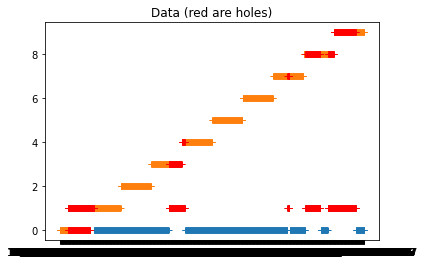

In [14]:
plt.plot(df_with_holes, "+")
plt.plot(df_with_holes[df_with_holes['is_hole'] != 0], 'r+')
plt.title("Data (red are holes)")
plt.show()

**Final format**

In [15]:
series_data = df_with_holes[df_with_holes['is_hole'] != 1].index.to_series().sort_values()

series_data

time
11/16/2022 15:26:47    11/16/2022 15:26:47
11/16/2022 15:27:47    11/16/2022 15:27:47
11/16/2022 15:28:47    11/16/2022 15:28:47
11/16/2022 15:29:47    11/16/2022 15:29:47
11/16/2022 15:30:47    11/16/2022 15:30:47
                              ...         
11/17/2022 15:22:47    11/17/2022 15:22:47
11/17/2022 15:23:47    11/17/2022 15:23:47
11/17/2022 15:24:47    11/17/2022 15:24:47
11/17/2022 15:25:47    11/17/2022 15:25:47
11/17/2022 15:26:47    11/17/2022 15:26:47
Name: time, Length: 1024, dtype: object

**Create data**

In [16]:
# Drop holes
df = df_with_holes[df_with_holes['is_hole'] != 1]

df.drop(columns='is_hole', inplace=True)


# Create fake cols of values
df["tm_1"] = np.random.randint(0, 10, size=len(df))
df["tm_2"] = np.random.randint(0, 10, size=len(df))

df.head(2)

/opt/rh/rh-python38/root/usr/local/lib64/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_135888/2073913602.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tm_1"] = np.random.randint(0, 10, size=len(df))
/tmp/ipykernel_135888/2073913602.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,orbit_id,tm_1,tm_2
time,,,
11/16/2022 15:26:47,0,0,1
11/16/2022 15:27:47,0,1,5


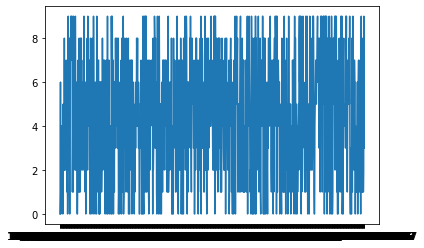

In [17]:
plt.plot(df.tm_1)

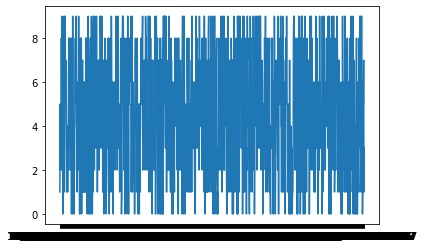

In [18]:
plt.plot(df.tm_2)

In [19]:
df = df.reset_index()

**Create shifts**

* Choose one orbit
* plus 200%

In [20]:
df

,time,orbit_id,tm_1,tm_2
0,11/16/2022 15:26:47,0,0,1
1,11/16/2022 15:27:47,0,1,5
2,11/16/2022 15:28:47,0,6,2
3,11/16/2022 15:29:47,0,0,3
4,11/16/2022 15:30:47,0,1,2
...,...,...,...,...
1019,11/17/2022 15:22:47,9,4,6
1020,11/17/2022 15:23:47,9,1,5
1021,11/17/2022 15:24:47,9,2,7
1022,11/17/2022 15:25:47,9,9,1


In [23]:
orbit_to_shift = 2

In [24]:
# 200% shift 
new_value = df[df.orbit_id == orbit_to_shift]['tm_2'] * 2
df.loc[df.orbit_id == 2, 'tm_2'] = new_value

**See result**

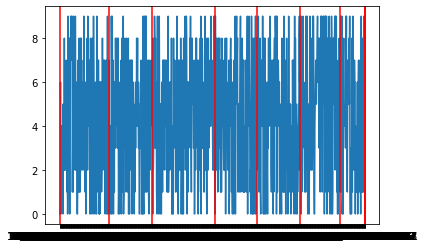

In [25]:
plt.plot(df.time, df.tm_1)

# One red vertical line per orbit
for k in df_time.reset_index().groupby('orbit_id').first()["time"]:
    plt.axvline(k, color='r')

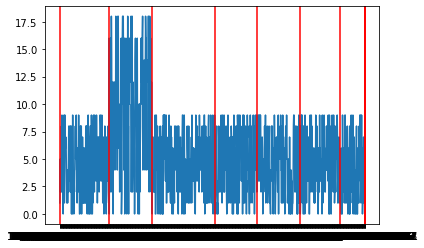

In [26]:
plt.plot(df.time, df.tm_2)

# One red vertical line per orbit
for k in df_time.reset_index().groupby('orbit_id').first()["time"]:
    plt.axvline(k, color='r')   

In [27]:
df.groupby("orbit_id").mean()

,tm_1,tm_2
orbit_id,,
0,3.657895,4.289474
1,4.259843,4.559055
2,4.131944,9.750000
3,4.096386,4.361446
4,4.648438,4.437500
5,4.444444,4.597222
6,4.347222,4.680556
7,4.783582,4.686567
8,4.619048,4.119048


**Artificially create spikes**

At random loc

In [28]:
np.random.seed(SEED)
nb_spikes=1
spikes_values = 10e4  # all the same value (easier to generate)

# Determine (randomly) if first TM shall have consecutive spikes or not
is_consecutive = np.random.choice([True, False])  

for tm in ["tm_1", "tm_2"]:

    # If consecutive:...
    if is_consecutive:
        # Generate the position of the first oultier (the second one shall be at position+1)
        spike_index = np.random.randint(0, len(df) -1)
        
        spike_position = df.iloc[[spike_index, spike_index+1]].index.values
        
        df.loc[spike_position, tm] = spikes_values 
        
        print(f"TM: {tm}, consecutive spikes at: {df[df[tm] > 10e3]}")
    else:
        # Generate just one spike
        spike_index = np.random.randint(0, len(df) -1)
        
        spike_position = df.iloc[[spike_index]].index.values
        
        df.loc[spike_position, tm] = spikes_values 
        
        print(f"TM: {tm}, 1 spikes at: {df[df[tm] > 10e3]}")
        
    # Next TM=> generate the contrary situation
    is_consecutive = not is_consecutive


TM: tm_1, 1 spikes at:                     time  orbit_id    tm_1  tm_2
235  11/16/2022 21:25:02         2  100000    12
TM: tm_2, consecutive spikes at:                     time  orbit_id  tm_1    tm_2
908  11/17/2022 10:05:33         7     4  100000
909  11/17/2022 10:06:33         7     2  100000


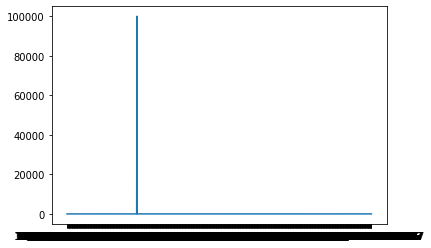

In [29]:
plt.plot(df.time, df.tm_1)

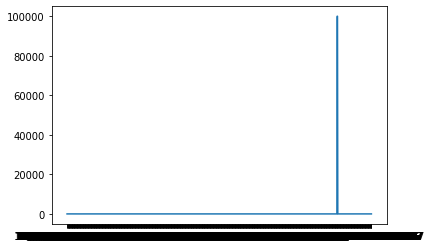

In [30]:
plt.plot(df.time, df.tm_2)

**Write result in a csv**

In [34]:
df.to_csv("data/data.csv", index=False)

In [35]:
pd.read_csv("data/data.csv").head()

,time,orbit_id,tm_1,tm_2
0,11/16/2022 15:26:47,0,0,1
1,11/16/2022 15:27:47,0,1,5
2,11/16/2022 15:28:47,0,6,2
3,11/16/2022 15:29:47,0,0,3
4,11/16/2022 15:30:47,0,1,2
